# DATA SCIENCE PRINCIPLES - ECE 461P
### Term Project - Group 3 (What Makes a Song Dancable?)

Steven Nguyen (sn24356)

Alex Meeler

Hansika

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
data = pd.read_csv('dataset.csv', index_col=0)

# DATA PREPROCESSING

### REMOVE UNWANTED FEATURES

In [3]:
from copy import deepcopy

# Extract column names of selected features
unselected_cols = ['track_id', 'artists', 'track_name', 'album_name', 'duration_ms', 'explicit']
cols = list(data.columns)
selected_cols = [col_name for col_name in cols if col_name not in unselected_cols]

# Extract selected data
sel_data = deepcopy(data.loc[:, selected_cols])

In [4]:
print(sel_data.shape)
sel_data.head()

(114000, 14)


,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### ENCODING CATEGORICAL FEATURES

In [5]:
# One hot encoding for categorical features: key, time signature, track genre
enc_data = pd.get_dummies(sel_data, columns=['key', 'time_signature', 'track_genre'])

print(enc_data.columns.values)
print(enc_data.shape)
enc_data.head()

['popularity' 'danceability' 'energy' 'loudness' 'mode' 'speechiness'
 'acousticness' 'instrumentalness' 'liveness' 'valence' 'tempo' 'key_0'
 'key_1' 'key_2' 'key_3' 'key_4' 'key_5' 'key_6' 'key_7' 'key_8' 'key_9'
 'key_10' 'key_11' 'time_signature_0' 'time_signature_1'
 'time_signature_3' 'time_signature_4' 'time_signature_5'
 'track_genre_acoustic' 'track_genre_afrobeat' 'track_genre_alt-rock'
 'track_genre_alternative' 'track_genre_ambient' 'track_genre_anime'
 'track_genre_black-metal' 'track_genre_bluegrass' 'track_genre_blues'
 'track_genre_brazil' 'track_genre_breakbeat' 'track_genre_british'
 'track_genre_cantopop' 'track_genre_chicago-house' 'track_genre_children'
 'track_genre_chill' 'track_genre_classical' 'track_genre_club'
 'track_genre_comedy' 'track_genre_country' 'track_genre_dance'
 'track_genre_dancehall' 'track_genre_death-metal'
 'track_genre_deep-house' 'track_genre_detroit-techno' 'track_genre_disco'
 'track_genre_disney' 'track_genre_drum-and-bass' 'track_genre_

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,...,0,0,0,0,0,0,0,0,0,0
1,55,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,...,0,0,0,0,0,0,0,0,0,0
2,57,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,...,0,0,0,0,0,0,0,0,0,0
3,71,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,...,0,0,0,0,0,0,0,0,0,0
4,82,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Separate input data and target data
input_df = deepcopy(enc_data.drop(columns=['danceability']))
target_df = deepcopy(enc_data.loc[:, 'danceability'])

### NORMALIZE SKEWED DATA

In [7]:
from sklearn.preprocessing import PowerTransformer

def skew_plot(feat_data, feat_name):
    matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
    pt = PowerTransformer(method='yeo-johnson')
    df_arr = feat_data.to_numpy()
    df_norm = pt.fit_transform(df_arr.reshape(-1, 1)).ravel()
    feat_datas = pd.DataFrame({feat_name:feat_data, f"normalized {feat_name}":df_norm})
    feat_datas.hist()
    return df_norm

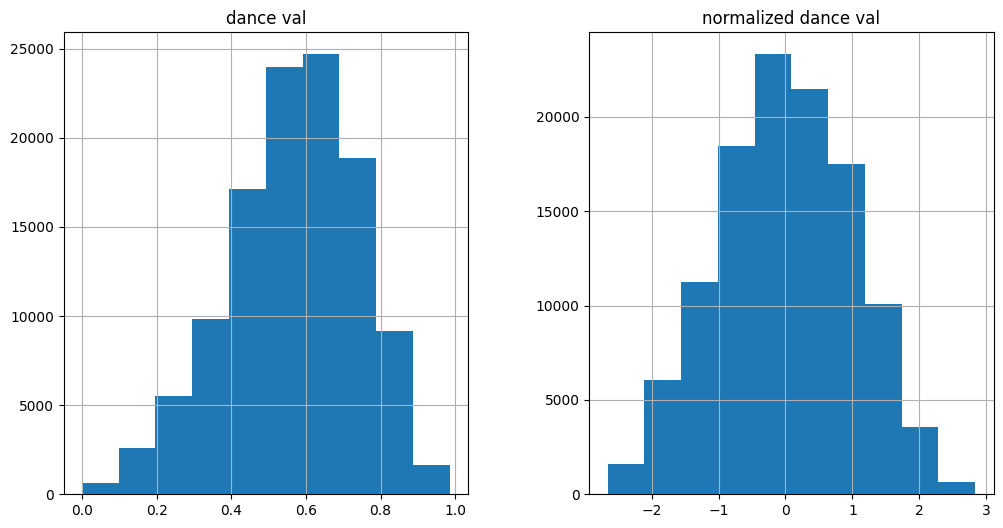

In [8]:
norm_dance = skew_plot(target_df, "dance val")

# target_df = pd.DataFrame(norm_dance)

In [9]:
from scipy.stats import skew

numeric_feats = pd.Index(['popularity', 'energy', 'loudness', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

skewed_feats = input_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

skewed_feats

Index(['speechiness', 'instrumentalness', 'liveness'], dtype='object')

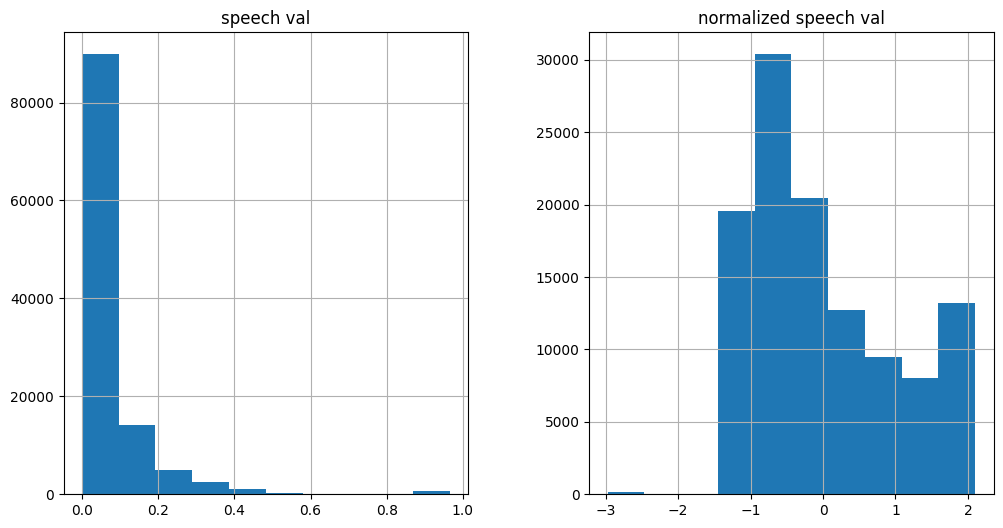

In [10]:
norm_speech = skew_plot(input_df['speechiness'], "speech val")

# input_df['speechiness'] = norm_speech

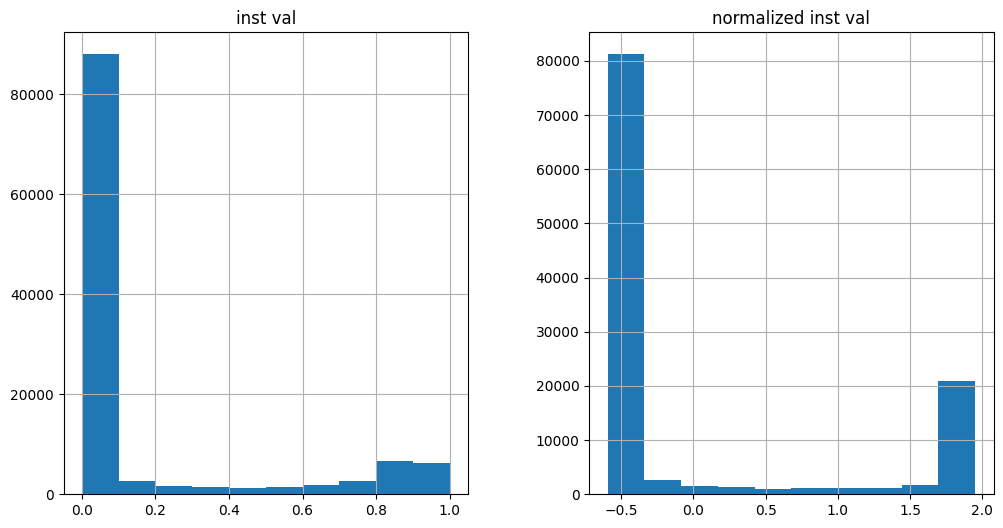

In [11]:
norm_inst = skew_plot(input_df['instrumentalness'], "inst val")

# input_df['instrumentalness'] = norm_inst

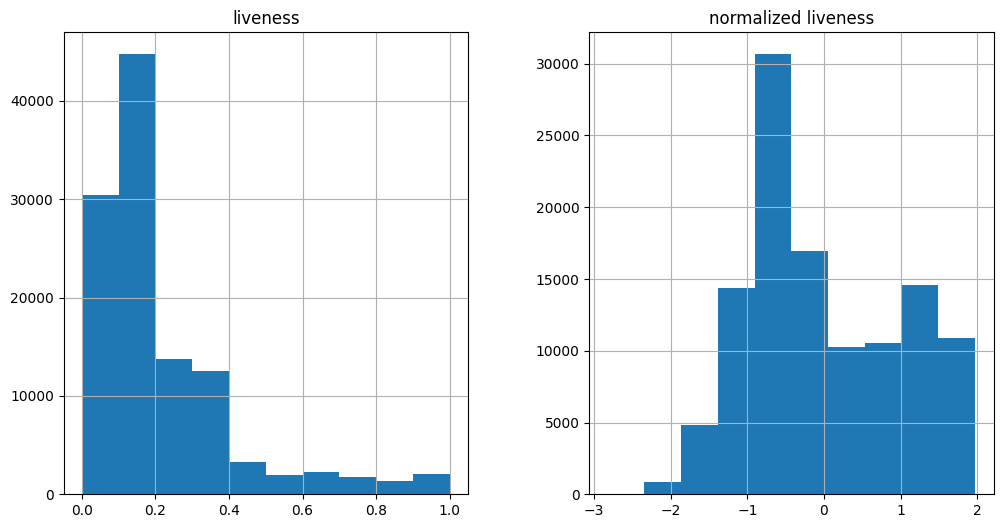

In [12]:
norm_live = skew_plot(input_df['liveness'], "liveness")

# input_df['liveness'] = norm_live

# MODEL TRAINING / TESTING

### TRAIN TEST SPLIT

In [13]:
# Extract data and targets

y = target_df.to_numpy()
X = input_df.to_numpy()

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (114000, 141)
y shape: (114000,)


In [14]:
from sklearn.model_selection import train_test_split

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, train_size=0.2, random_state=58)

### EVALUATION METRIC

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

# mean squared error
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    # print('MSE: %2.3f' % mse)
    return mse

# root mean square error
def RMSE(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # print('RMSE: %2.3f' % rmse)
    return rmse

# mean absolute error
def MAE(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    # print('MAE: %2.3f' % mae)
    return mae

### CROSS VALIDATION

In [16]:
from sklearn.model_selection import GridSearchCV

# cross validation method for hyper parameter tuning
def gridsearch_cv(model, params, model_name, cv):
    
    # initialize gridsearch (with RMSE scoring)
    scorer = make_scorer(RMSE, greater_is_better=False)
    gs_model = GridSearchCV(estimator=model, param_grid=params, scoring=scorer, cv=cv)

    # fit the grid search model with the train data and print the best parameters
    gs_model.fit(X_train, y_train)
    print(f'{model_name} best params:\n{gs_model.best_params_}')

    # use the fitted model with the best parameters to predict on the test set and report the metrics
    y_pred = gs_model.predict(X_test)

    # Report error
    print(f'RMSE of best {model_name} model: {RMSE(y_test, y_pred)}')

In [17]:
from sklearn.model_selection import cross_val_score

def mse_cvs(model):
    
    scorer = make_scorer(RMSE, greater_is_better=False)  

    mse = -cross_val_score(model, X_train, y_train, scoring=scorer, cv = 5)
    return mse

### SIMPLE LINEAR REGRESSION

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

params = {}

gridsearch_cv(lin_reg, params, "Linear Regression", 5)

Linear Regression best params:
{}
RMSE of best Linear Regression model: 0.1157058725625805


### RIDGE REGRESSION

Text(0.5, 1.0, 'RMSE of Ridge Regression with alpha: [0.0001, 2]')

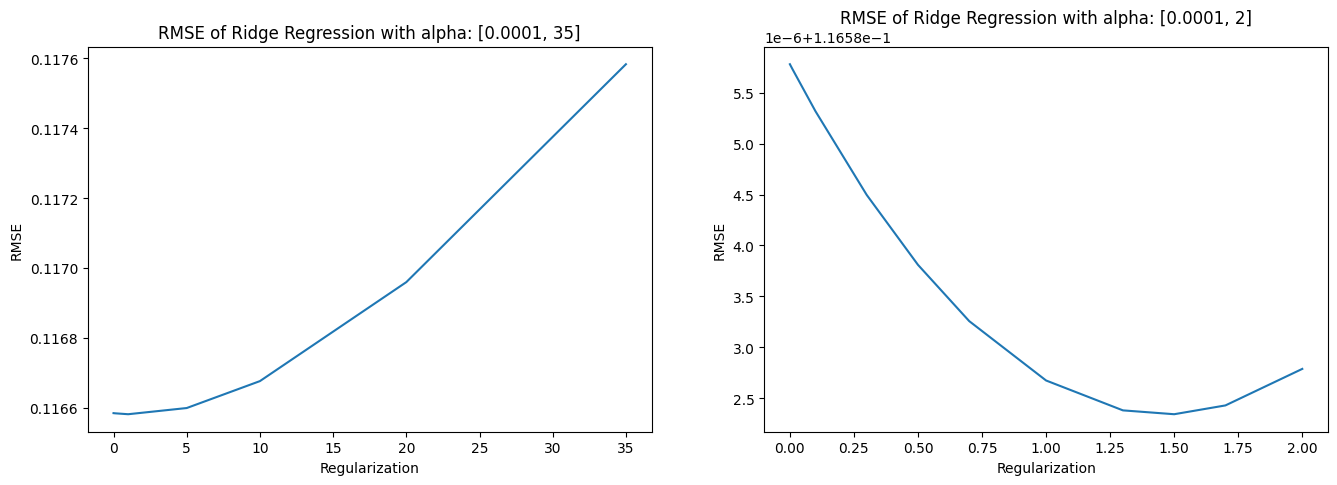

In [19]:
from sklearn.linear_model import Ridge

# test out orders of alpha values for ridge regression
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 35]

mse_scores = []
for alpha in alphas:
    mse_scores.append(mse_cvs(Ridge(alpha=alpha)).mean())


plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_scores)
plt.ylabel("RMSE")
plt.xlabel("Regularization")
plt.title("RMSE of Ridge Regression with alpha: [0.0001, 35]")


# test out a smaller range of alphas
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 1.3, 1.5, 1.7, 2]

mse_scores = []
for alpha in alphas:
    mse_scores.append(mse_cvs(Ridge(alpha=alpha, random_state=42)).mean())
plt.subplot(1, 2, 2)
plt.plot(alphas, mse_scores)
plt.ylabel("RMSE")
plt.xlabel("Regularization")
plt.title("RMSE of Ridge Regression with alpha: [0.0001, 2]")


Based on the first graph, the ridge regression model acheives the lowest RMSE near zero.

To take a closer look, we ran the cross validation again with a more narrow range (zooming in).

In the second graph, we can see that the reg coef between 1 and 2 performs the best.

In [20]:
# 11 reg coef values with range [1, 2]
alphas = np.linspace(1, 2, 11)

ridge_reg = Ridge(random_state=42)

params = {
    'alpha': alphas
}

# gridsearch for best performing alpha
gridsearch_cv(ridge_reg, params, "Ridge Regression", 5)

Ridge Regression best params:
{'alpha': 1.5}
RMSE of best Ridge Regression model: 0.11570079772344041


### LASSO REGRESSION

Text(0.5, 1.0, 'RMSE of Lasso Regression with alpha: [0.0001, 0.3]')

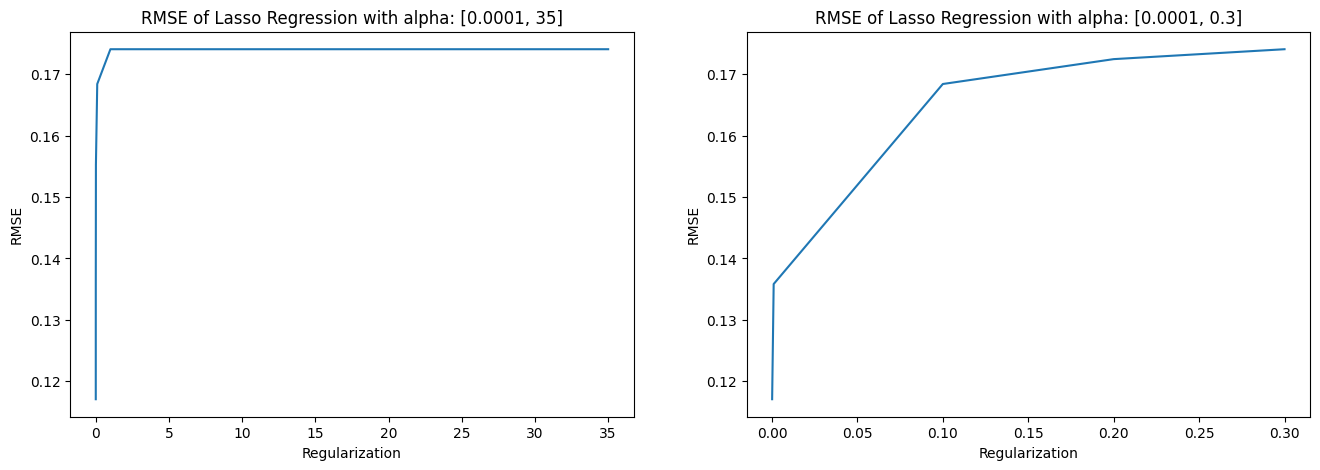

In [21]:
from sklearn.linear_model import Lasso

# test out orders of alpha values for Lasso regression
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 35]

mse_scores = []
for alpha in alphas:
    mse_scores.append(mse_cvs(Lasso(alpha=alpha)).mean())


plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_scores)
plt.ylabel("RMSE")
plt.xlabel("Regularization")
plt.title("RMSE of Lasso Regression with alpha: [0.0001, 35]")


# test out a smaller range of alphas
alphas = [0.0001, 0.001, 0.1, 0.2, 0.3]

mse_scores = []
for alpha in alphas:
    mse_scores.append(mse_cvs(Lasso(alpha=alpha, random_state=42)).mean())
plt.subplot(1, 2, 2)
plt.plot(alphas, mse_scores)
plt.ylabel("RMSE")
plt.xlabel("Regularization")
plt.title("RMSE of Lasso Regression with alpha: [0.0001, 0.3]")

Based on both graphs, a zero reg coef Lasso model performs the best.

In [22]:
# 6 reg coef values with range [0.00001, 0.01]
alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.01]

lasso_reg = Lasso(random_state=42)

params = {
    'alpha': alphas
}

# gridsearch for best performing alpha
gridsearch_cv(lasso_reg, params, "Lasso Regression", 5)

Lasso Regression best params:
{'alpha': 1e-05}
RMSE of best Lasso Regression model: 0.11569695206478496


### DECISION TREE REGRESSION

In [23]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)

params = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

gridsearch_cv(dt_reg, params, "Decision Tree Regression", 5)

Decision Tree Regression best params:
{'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20, 'splitter': 'random'}
RMSE of best Decision Tree Regression model: 0.12359208990806018


### GRADIENT BOOSTING REGRESSION

In [24]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)

params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'random_state': [42]
}

# gridsearch_cv(xgb_reg, params, "XGB Regression", 3)


### Performance Conclusion (best to worst)

Best Lasso Regression RMSE:&emsp;&nbsp;&nbsp;0.11569695206478496

Best Ridge Regression RMSE:&emsp;&nbsp;&nbsp;0.11570079772344041

Linear Regression RMSE:&emsp;&emsp;&emsp;&ensp;0.1157058725625805

Best Decision Tree Reg RMSE:&emsp;&nbsp;0.12359208990806018

Best XGB Regression RMSE:       


Based on the RMSE of each hypertuned model, the best performing model is Lasso Regression.

# FEATURE ANALYSIS

In [25]:
# lowest RSME model
lasso_reg = Lasso(alpha = 0.00001, random_state=42).fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE: 0.11569695206478496


In [26]:
# checking encoded feature ranges
print(input_df.columns[0:10])   # features 0 - 9 are the numerical features (plus mode)
print(input_df.columns[10:22])  # features 10 - 21 are the keys
print(input_df.columns[22:27])  # features 22 - 26 are the time signatures
print(input_df.columns[27:])    # features 27 - 140 are the track genres

Index(['popularity', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')
Index(['key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7',
       'key_8', 'key_9', 'key_10', 'key_11'],
      dtype='object')
Index(['time_signature_0', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5'],
      dtype='object')
Index(['track_genre_acoustic', 'track_genre_afrobeat', 'track_genre_alt-rock',
       'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime',
       'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues',
       'track_genre_brazil',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='ob

### WHICH FEATURES HAD A  ZERO-VALUE COEF?

In [27]:
# which features had a zero coef
print("Features with a zero coef:")
feat_labels = input_df.columns.to_numpy()
for i in range(len(lasso_reg.coef_)):
    if lasso_reg.coef_[i] == 0:
        print(feat_labels[i])

Features with a zero coef:
key_0
time_signature_1
time_signature_5
track_genre_cantopop
track_genre_guitar
track_genre_pop-film


### WHICH NUMERICAL VALUES HAD THE MOST IMPORTANCE/INFLUENCE?

In [46]:
# display coef values of feature labels for comparison
def display_coef(start, end, f_type, f_label):

    # match coef vals with feature labels
    coefs = pd.DataFrame({"coef":lasso_reg.coef_[start:end], "feature":feat_labels[start:end]})

    # sort features by coef val (high to low)
    sorted_coef = coefs.sort_values("coef", ascending=False)

    if f_type == "key":
        print(sorted_coef)

        # plot table
        key_dict = {'0':'C', '1':'C#/Df', '2':'D', '3':'D#/Ef', '4':'E', '5':'F', '6':'F#/Gf', '7':'G', '8':'G#/AF', '9':'A', '10':'A#/Bf', '11':'B'}
        plt.figure(figsize=(15, 10))
        plt.bar(sorted_coef["feature"], sorted_coef["coef"])

    elif f_type == "time signature":
        print(sorted_coef)

        timesig_dict = {}
        plt.figure(figsize=(15, 10))
        plt.bar(sorted_coef["feature"], sorted_coef["coef"])

    elif f_type == "track genres":
        
        top_bot_5 = pd.concat((sorted_coef.head(), sorted_coef.tail()))
        tg_list = top_bot_5["feature"].to_numpy()
        rem_tg_list = []
        for tg in tg_list:
            rem_tg_list.append(tg.replace('track_genre_', ''))

        print(top_bot_5)

        # plot table
        plt.figure(figsize=(15, 10))
        plt.bar(rem_tg_list, top_bot_5["coef"])

    else:
        print(sorted_coef)

        # plot table
        plt.figure(figsize=(15, 10))
        plt.bar(sorted_coef["feature"], sorted_coef["coef"])
        
    plt.title(f"Coef values of {f_type} features")
    plt.ylabel("RMSE")
    plt.xlabel(f_label)  

       coef           feature
8  0.239769           valence
4  0.173362       speechiness
2  0.004583          loudness
0  0.000199        popularity
9 -0.000688             tempo
6 -0.008237  instrumentalness
3 -0.009724              mode
5 -0.052772      acousticness
7 -0.083389          liveness
1 -0.135489            energy


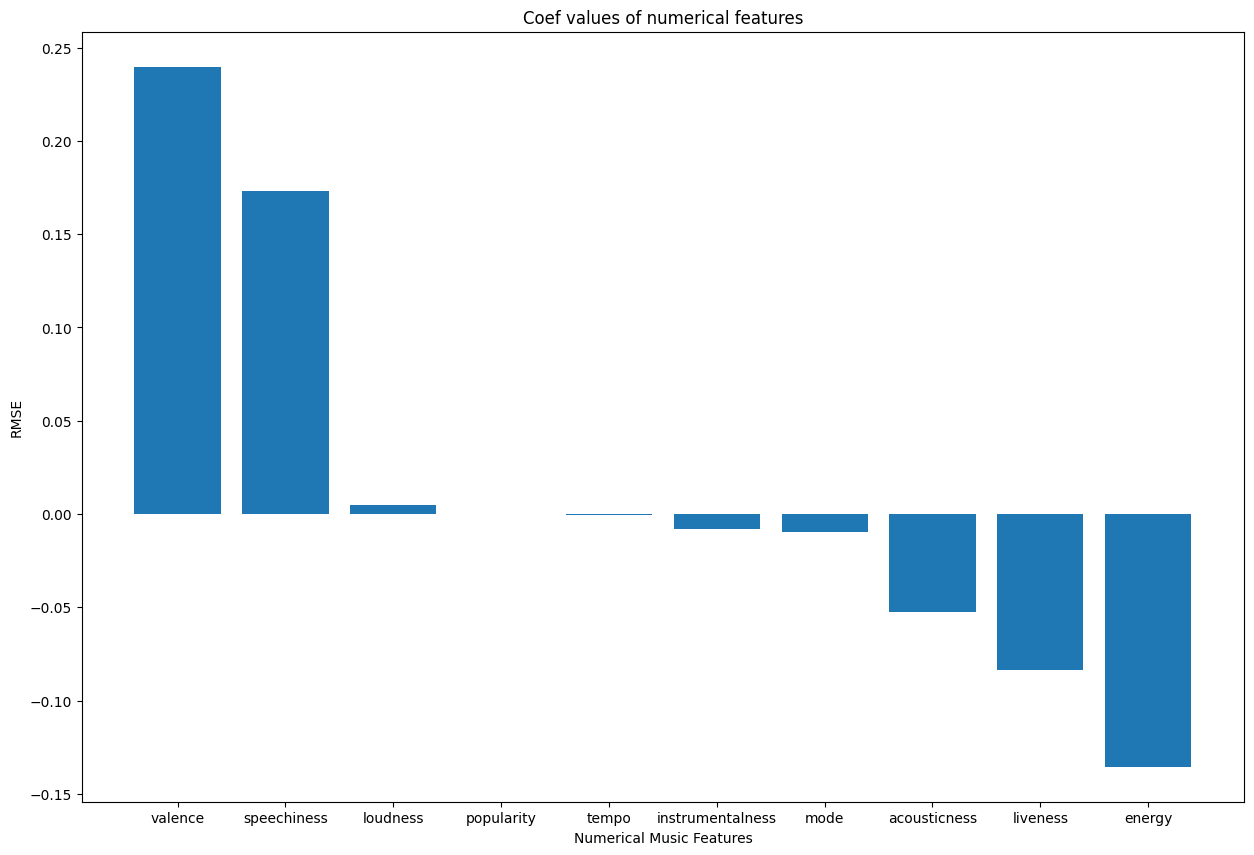

In [32]:
# Compare numerical features
display_coef(0, 10, "numerical", "Numerical Music Features")

Valence and speechiness have the strongest positive correlation with danceability.

Energy, liveness, and acousticness have the strongest negative correlation with danceability. (interestingly enough)

Loudness, popularity, tempo, instrumentalness, and mode seem to have the least correlation with danceability.

### WHICH KEYS HAD THE MOST IMPORTANCE/INFLUENCE?

        coef feature
10  0.010997  key_10
1   0.009131   key_1
11  0.007635  key_11
7   0.000413   key_7
8   0.000120   key_8
0   0.000000   key_0
6  -0.000658   key_6
2  -0.000779   key_2
4  -0.001071   key_4
9  -0.002599   key_9
3  -0.009058   key_3
5  -0.009260   key_5


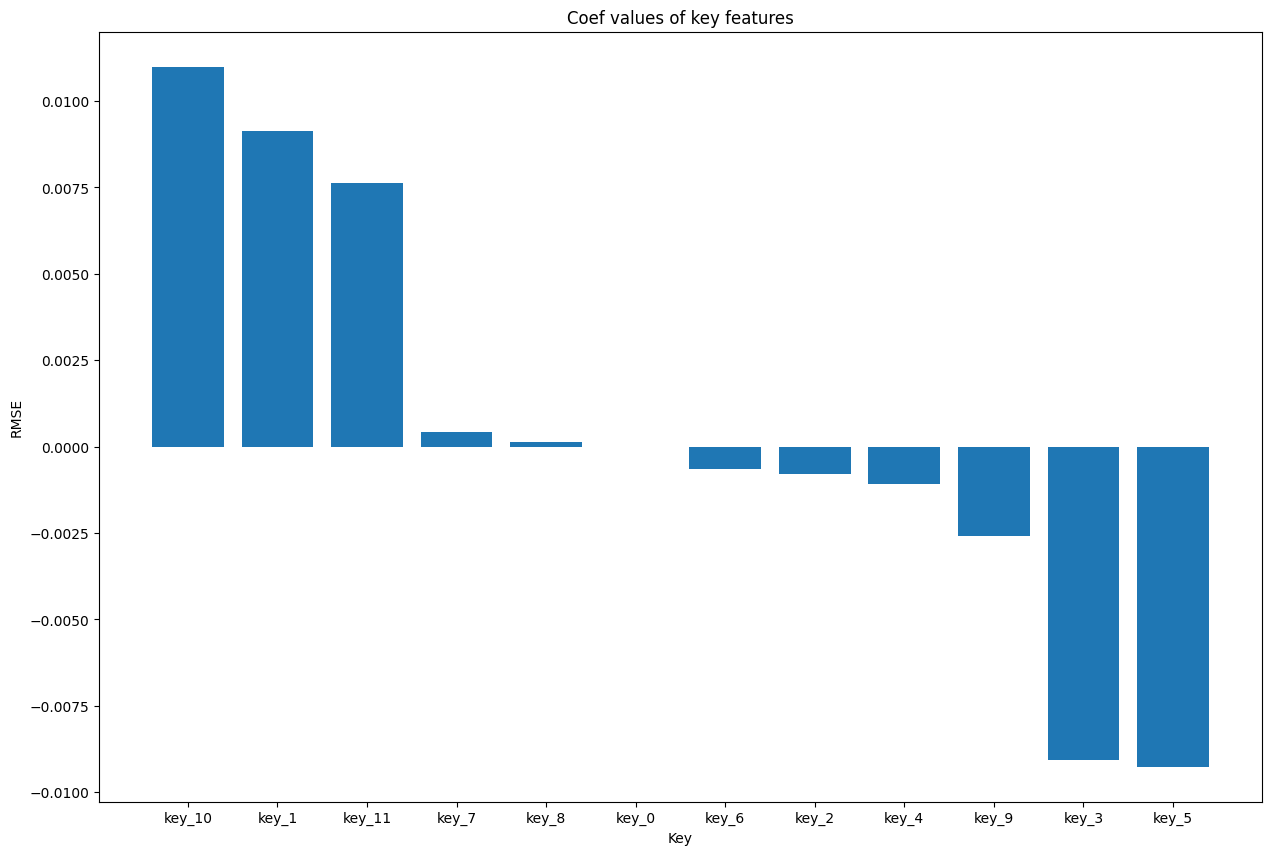

In [33]:
# Compare key types
display_coef(10, 22, "key", "Key")

### WHICH TIME SIGNATURES HAD THE MOST IMPORTANCE/INFLUENCE?

       coef           feature
3  0.066771  time_signature_4
2  0.006324  time_signature_3
1 -0.000000  time_signature_1
4 -0.000000  time_signature_5
0 -0.262036  time_signature_0


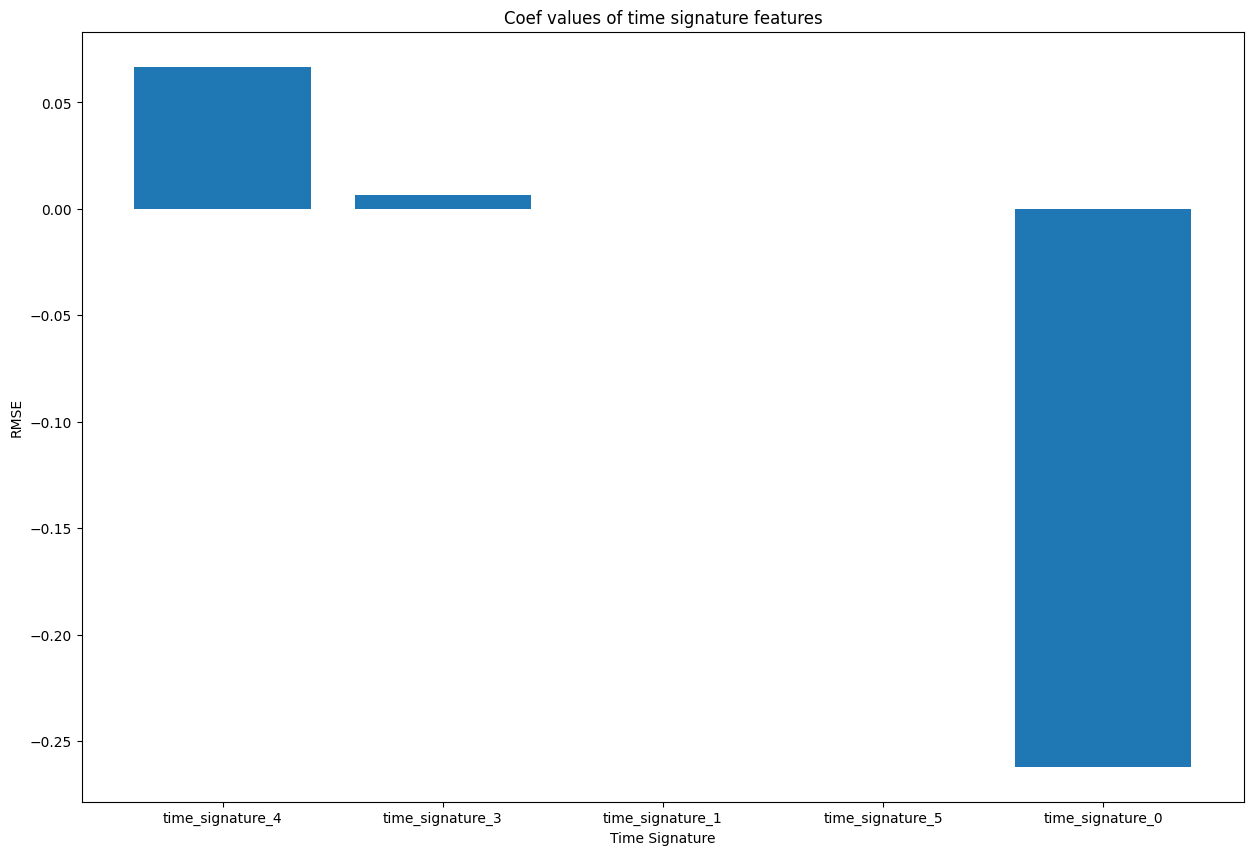

In [38]:
# Compare time signature types
display_coef(22, 27, "time signature", "Time Signature")

### WHICH TRACK GENRES ARE THE MOST/LEAST DANCEABLE?

         coef                     feature
73   0.189451  track_genre_minimal-techno
24   0.165873  track_genre_detroit-techno
13   0.163766   track_genre_chicago-house
109  0.141519          track_genre_techno
66   0.141435            track_genre_kids
59  -0.144655         track_genre_iranian
6   -0.171671     track_genre_black-metal
76  -0.173356           track_genre_opera
101 -0.191912           track_genre_sleep
42  -0.217371       track_genre_grindcore


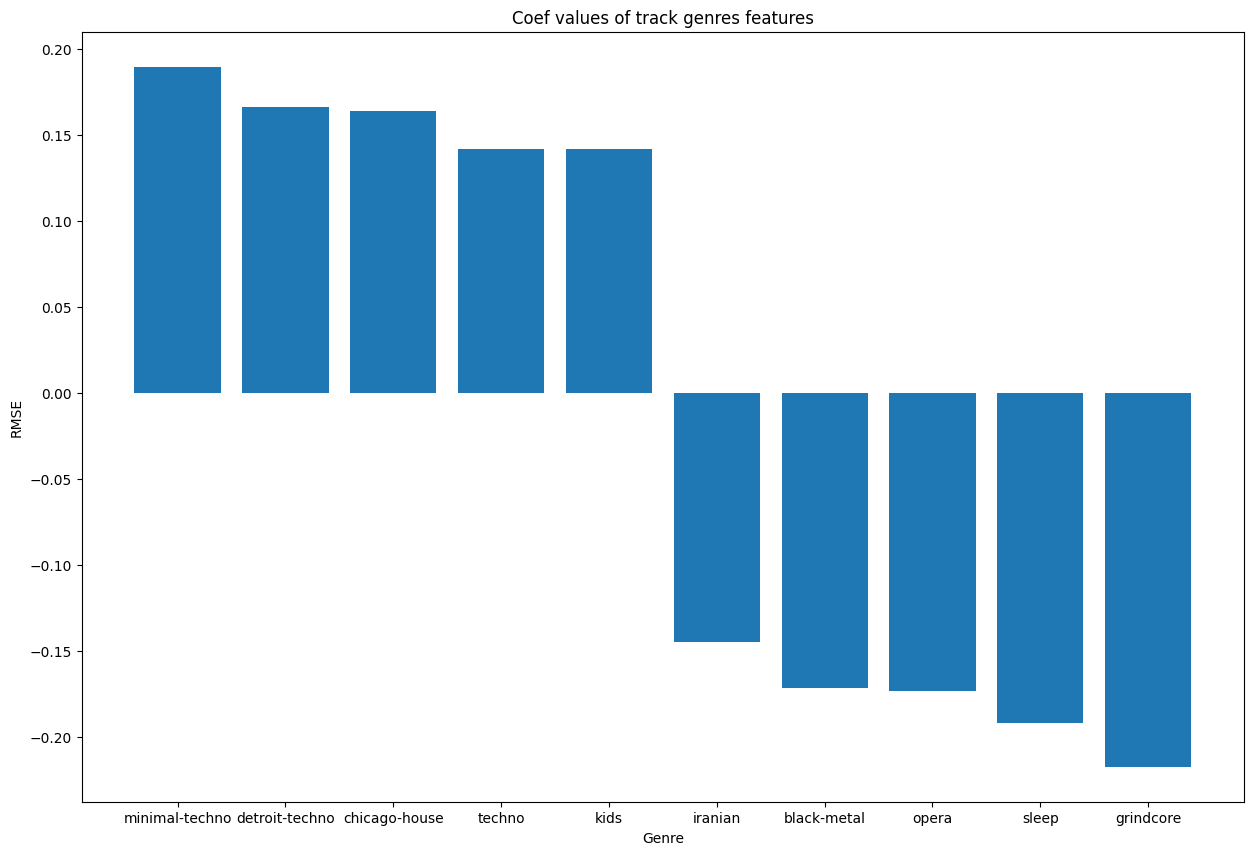

In [47]:
# Compare track genre types
display_coef(27, 140, "track genres", "Genre")

Top 5 most danceable track genres are (in order): minimal-techno, detroit-techno, chicago-house, techno, kids.

Top 5 least danceable track genres are (in order from most to least in magntitude): grindcore, sleep, opera, black-metal, iranian.

## TESTING OUR MODEL ON A CONSENSUS DANCABLE SONG

### 'Gettin' Jiggy Wit It' by Will Smith

In [ ]:
# create data point with 'Jiggy' song feature values

jig_song = np.zeros(141).T
jig_point = pd.DataFrame(jig_song).transpose()
jig_point.columns = input_df.columns

f_list = ['key_6', 'time_signature_4', 'track_genre_hip-hop', 'track_genre_pop', 'track_genre_r-n-b', 'track_genre_soul']
f_indices = list(range(0, 10))
for i in range(len(jig_point.columns)):
    if jig_point.columns[i] in f_list:
        f_indices.append(i)


f_vals = [68, 0.87, -5, 1, 0.3, 0.14, 0, 0.15, 0.86, 108, 1, 1, 1, 1, 1, 1]

for i in range(len(f_indices)):
    jig_point.iloc[:,f_indices[i]] = f_vals[i]

In [ ]:
# predict song danceability (with should be 0.88)
j_test = jig_point.to_numpy()
jiggy_dance = lasso_reg.predict(j_test)
print(f'Expected Danceability score of \'Gettin\' Jiggy Wit It\': 0.88')
print(f'Model Danceability score of \'Gettin\' Jiggy Wit It\': {jiggy_dance[0]}')

Expected Danceability score of 'Gettin' Jiggy Wit It': 0.88
Model Danceability score of 'Gettin' Jiggy Wit It': 0.8901689989986994
